In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import scipy.stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from kneed import KneeLocator

def decrire_table(val):
    """
    Applies dtypes, describe(), isnull().sum() and .duplicated()sum() methods to the data frame
    """
    print("-"*20)
    print(val.dtypes)
    print("-"*20)
    print(val.describe())
    print("-"*20)
    print("Number of NAN:\n",val.isnull().sum())
    print("-"*20)
    print("Number of duplicates: ", val.duplicated(keep=False).sum())

In [3]:
dispo_alimeantaire = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P9_ocon_jorge/DAN-P9-data/DisponibiliteAlimentaire_2017.csv")
population_2000_2018 = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P9_ocon_jorge/DAN-P9-data/Population_2000_2018.csv")
PIB_2017 = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P9_ocon_jorge/DAN-P9-data/PIB_2017.csv")


dispo_alimeantaire_copy = dispo_alimeantaire.copy()
population_2000_2018_copy = population_2000_2018.copy()
PIB_2017_copy = PIB_2017.copy()

 ### Reshaping

#### Reshaping: population_2000_2018

In [7]:
population_2000_2018.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


In [8]:
population_2000_2018 = population_2000_2018.set_index(["Zone", "Année"], drop=True).unstack()["Valeur"].reset_index()
population_2000_2018.head(3)

Année,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
1,Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518
2,Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740


In [9]:
population_2017 = population_2000_2018[['Zone', 2017]]
population_2017 = population_2017.rename(columns={2017:"2017 (en milliers)"})

#### Reshaping: dispo_alimeantaire

In [10]:
dispo_alimeantaire.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


In [11]:
dispo_alimeantaire_2017 = dispo_alimeantaire[(dispo_alimeantaire.Produit.isin(["Viande de Volailles"]))]
dispo_alimeantaire_2017 = dispo_alimeantaire_2017.set_index(["Zone", "Élément","Produit"], drop=True).unstack()["Valeur"].reset_index()
dispo_alimeantaire_2017 = dispo_alimeantaire_2017.set_index(["Zone", "Élément"], drop=True).unstack()["Viande de Volailles"].reset_index()

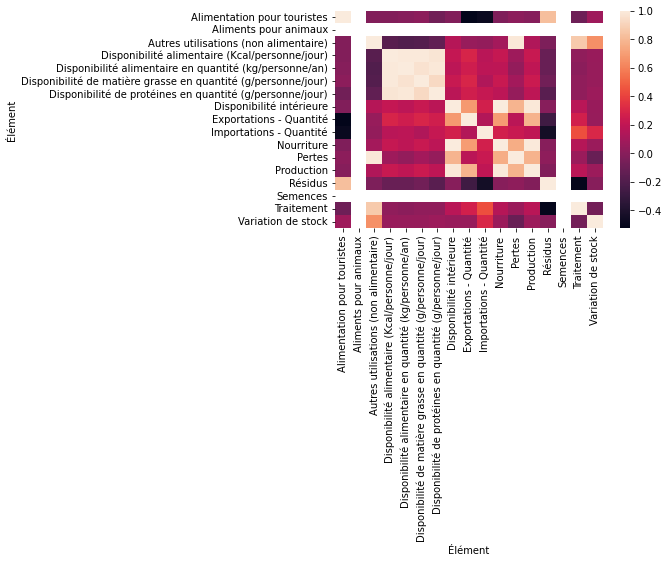

In [12]:
corr_matrix = dispo_alimeantaire_2017.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [13]:
dispo_alimeantaire_2017 = dispo_alimeantaire_2017.drop(columns=['Aliments pour animaux', 'Autres utilisations (non alimentaire)', 'Alimentation pour touristes', 
                                                                'Semences', 'Traitement', 'Variation de stock', 'Disponibilité alimentaire (Kcal/personne/jour)', 
                                                                'Nourriture', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 
                                                               'Disponibilité de protéines en quantité (g/personne/jour)', 'Pertes', 'Résidus']).fillna(0)


dispo_alimeantaire_2017.head(3)

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,1.53,57.0,0.0,29.0,28.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0
2,Albanie,16.36,47.0,0.0,38.0,13.0


#### Reshaping: PIB_2017

In [14]:
PIB_2017.head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,18896.352021,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,349006.689642,X,Ciffre de sources internationales,NaN


In [15]:
PIB_2017 = PIB_2017.set_index(["Zone", "Élément","Produit"], drop=True).unstack()["Valeur"].reset_index()
PIB_2017 = PIB_2017.set_index(["Zone", "Élément"], drop=True).unstack()["Produit Intérieur Brut"].reset_index()

PIB_2017.head(3)

Élément,Zone,Valeur US $,Valeur US $ par habitant
0,Afghanistan,18896.352021,520.616409
1,Afrique du Sud,349006.689642,6121.876572
2,Albanie,13019.729856,4514.204908


### Merge de population, PIB et disponibilité alimentaire

In [16]:
population_dispo_alimenatire = dispo_alimeantaire_2017.merge(population_2017, left_on='Zone', right_on='Zone')
population_PIB_dispo_alimenatire = population_dispo_alimenatire.merge(PIB_2017, left_on='Zone', right_on='Zone')
population_PIB_dispo_alimenatire = population_PIB_dispo_alimenatire.set_index('Zone')
population_PIB_dispo_alimenatire.head(3)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,2017 (en milliers),Valeur US $,Valeur US $ par habitant
Zone,,,,,,,,
Afghanistan,1.53,57.0,0.0,29.0,28.0,36296.113,18896.352021,520.616409
Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,57009.756,349006.689642,6121.876572
Albanie,16.36,47.0,0.0,38.0,13.0,2884.169,13019.729856,4514.204908


In [17]:
population_PIB_dispo_alimenatire_copy = population_PIB_dispo_alimenatire.copy()

### Travail

In [18]:
X = population_PIB_dispo_alimenatire.values
X

array([[1.53000000e+00, 5.70000000e+01, 0.00000000e+00, ...,
        3.62961130e+04, 1.88963520e+04, 5.20616409e+02],
       [3.56900000e+01, 2.11800000e+03, 6.30000000e+01, ...,
        5.70097560e+04, 3.49006690e+05, 6.12187657e+03],
       [1.63600000e+01, 4.70000000e+01, 0.00000000e+00, ...,
        2.88416900e+03, 1.30197299e+04, 4.51420491e+03],
       ...,
       [5.56800000e+01, 1.82660000e+04, 3.69200000e+03, ...,
        3.25084756e+05, 1.94796230e+07, 5.99216747e+04],
       [1.30000000e-01, 1.40000000e+01, 0.00000000e+00, ...,
        1.06399924e+05, 7.67945169e+04, 7.21753494e+02],
       [4.45000000e+00, 3.00000000e+00, 0.00000000e+00, ...,
        6.36039000e+02, 1.48379875e+03, 2.33287385e+03]])

In [19]:
names = population_PIB_dispo_alimenatire.index
features = population_PIB_dispo_alimenatire.columns

#### Scale variables

In [20]:
scaler = StandardScaler()

In [21]:
#scaler.fit(X)

In [22]:
#population_PIB_dispo_alimenatire_scaled = scaler.transform(X)

In [23]:
X_scaled = scaler.fit_transform(X)

In [24]:
population_PIB_dispo_alimenatire_scaled = pd.DataFrame(X_scaled)
population_PIB_dispo_alimenatire_scaled.columns = population_PIB_dispo_alimenatire.columns

In [25]:
idx = ["mean", "std"]

pd.DataFrame(population_PIB_dispo_alimenatire_scaled).describe().round(2).loc[idx, :]

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,2017 (en milliers),Valeur US $,Valeur US $ par habitant
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##### ACP

In [26]:
n_components = 6
pca = PCA(n_components=n_components)

In [27]:
pca.fit(population_PIB_dispo_alimenatire_scaled)

PCA(n_components=6)

In [28]:
pca.explained_variance_ratio_

array([0.5021144 , 0.18749145, 0.11437595, 0.07940166, 0.0762646 ,
       0.03142656])

In [29]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([50.21, 18.75, 11.44,  7.94,  7.63,  3.14])

In [30]:
scree_cum = scree.cumsum().round()
scree_cum

array([50., 69., 80., 88., 96., 99.])

In [31]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

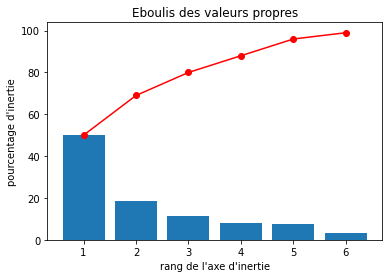

In [32]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

#### Components

In [33]:
pcs = pca.components_
pcs

array([[ 1.31804592e-01,  4.85127597e-01,  3.80496858e-01,
         1.76624630e-01,  4.85384999e-01,  3.24416966e-01,
         4.62712009e-01,  1.27895571e-01],
       [-5.89243271e-01,  1.23409836e-01, -9.25659163e-02,
        -3.23531383e-01,  1.11125794e-01,  3.67170113e-01,
         3.35683540e-02, -6.13214242e-01],
       [ 2.94113285e-01,  2.78853429e-02,  3.96590067e-01,
        -7.86447204e-01,  1.50906978e-01, -3.22325354e-01,
        -4.63398912e-02, -9.01274772e-02],
       [ 3.58736592e-03,  6.12009664e-04, -4.17301503e-01,
        -4.85663818e-01, -4.58901365e-02,  4.75543570e-01,
         7.67201037e-02,  5.96526028e-01],
       [ 7.35054980e-01,  7.11413203e-02, -3.41396015e-01,
         2.95852627e-02, -6.67855104e-03,  3.27642930e-01,
        -1.08149276e-01, -4.67028697e-01],
       [ 7.35908331e-03, -1.63392646e-01,  5.41852567e-01,
         7.21504852e-02, -6.26951239e-02,  5.15352376e-01,
        -6.27938041e-01,  1.03023574e-01]])

In [34]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.131805,0.485128,0.380497,0.176625,0.485385,0.324417,0.462712,0.127896
1,-0.589243,0.123410,-0.092566,-0.323531,0.111126,0.367170,0.033568,-0.613214
2,0.294113,0.027885,0.396590,-0.786447,0.150907,-0.322325,-0.046340,-0.090127
3,0.003587,0.000612,-0.417302,-0.485664,-0.045890,0.475544,0.076720,0.596526
4,0.735055,0.071141,-0.341396,0.029585,-0.006679,0.327643,-0.108149,-0.467029
5,0.007359,-0.163393,0.541853,0.072150,-0.062695,0.515352,-0.627938,0.103024


In [35]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(3)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,2017 (en milliers),Valeur US $,Valeur US $ par habitant
F1,0.132,0.485,0.380,0.177,0.485,0.324,0.463,0.128
F2,-0.589,0.123,-0.093,-0.324,0.111,0.367,0.034,-0.613
F3,0.294,0.028,0.397,-0.786,0.151,-0.322,-0.046,-0.090
F4,0.004,0.001,-0.417,-0.486,-0.046,0.476,0.077,0.597
F5,0.735,0.071,-0.341,0.030,-0.007,0.328,-0.108,-0.467
F6,0.007,-0.163,0.542,0.072,-0.063,0.515,-0.628,0.103


In [36]:
pcs.T

,F1,F2,F3,F4,F5,F6
Disponibilité alimentaire en quantité (kg/personne/an),0.131805,-0.589243,0.294113,0.003587,0.735055,0.007359
Disponibilité intérieure,0.485128,0.123410,0.027885,0.000612,0.071141,-0.163393
Exportations - Quantité,0.380497,-0.092566,0.396590,-0.417302,-0.341396,0.541853
Importations - Quantité,0.176625,-0.323531,-0.786447,-0.485664,0.029585,0.072150
Production,0.485385,0.111126,0.150907,-0.045890,-0.006679,-0.062695
2017 (en milliers),0.324417,0.367170,-0.322325,0.475544,0.327643,0.515352
Valeur US $,0.462712,0.033568,-0.046340,0.076720,-0.108149,-0.627938
Valeur US $ par habitant,0.127896,-0.613214,-0.090127,0.596526,-0.467029,0.103024


<AxesSubplot:>

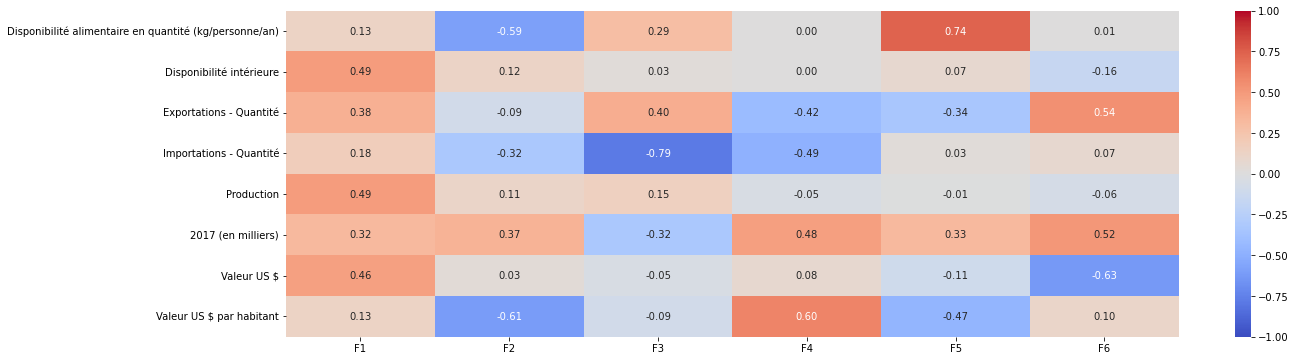

In [37]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Projection

In [38]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

C:\Users\ocon_\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-7.85760377e-01,  1.15525219e+00, -1.47201310e-01,
        -1.98517298e-01, -4.75827744e-01, -3.30786285e-02],
       [ 9.57058809e-01, -9.05182592e-01, -1.46311282e+00,
        -1.29536255e+00,  1.09349825e+00,  3.65645941e-02],
       [-7.04786784e-01,  3.79461871e-01,  1.41106291e-01,
        -1.99348847e-01,  4.64059090e-02, -1.10792520e-01],
       [-6.01080624e-01,  9.46537981e-01,  4.38748181e-02,
         1.42475383e-03, -3.32977034e-01, -7.93267640e-02],
       [ 2.65138441e+00, -2.11762214e+00, -2.98010996e+00,
        -1.27853550e+00, -1.12509924e+00,  3.19205593e-02]])

In [39]:
x_y = (0, 1)

In [93]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set2", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3' ])
    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

### Cluster ascendant hierarchique

In [41]:
Z = linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,59.0,125.0,0.025072,2.0
1,58.0,147.0,0.032439,2.0
2,146.0,164.0,0.035109,2.0
3,109.0,130.0,0.035563,2.0
4,23.0,92.0,0.036513,2.0
...,...,...,...,...
165,331.0,333.0,12.417314,93.0
166,325.0,336.0,14.836230,156.0
167,334.0,335.0,16.844119,4.0
168,332.0,337.0,18.184941,167.0


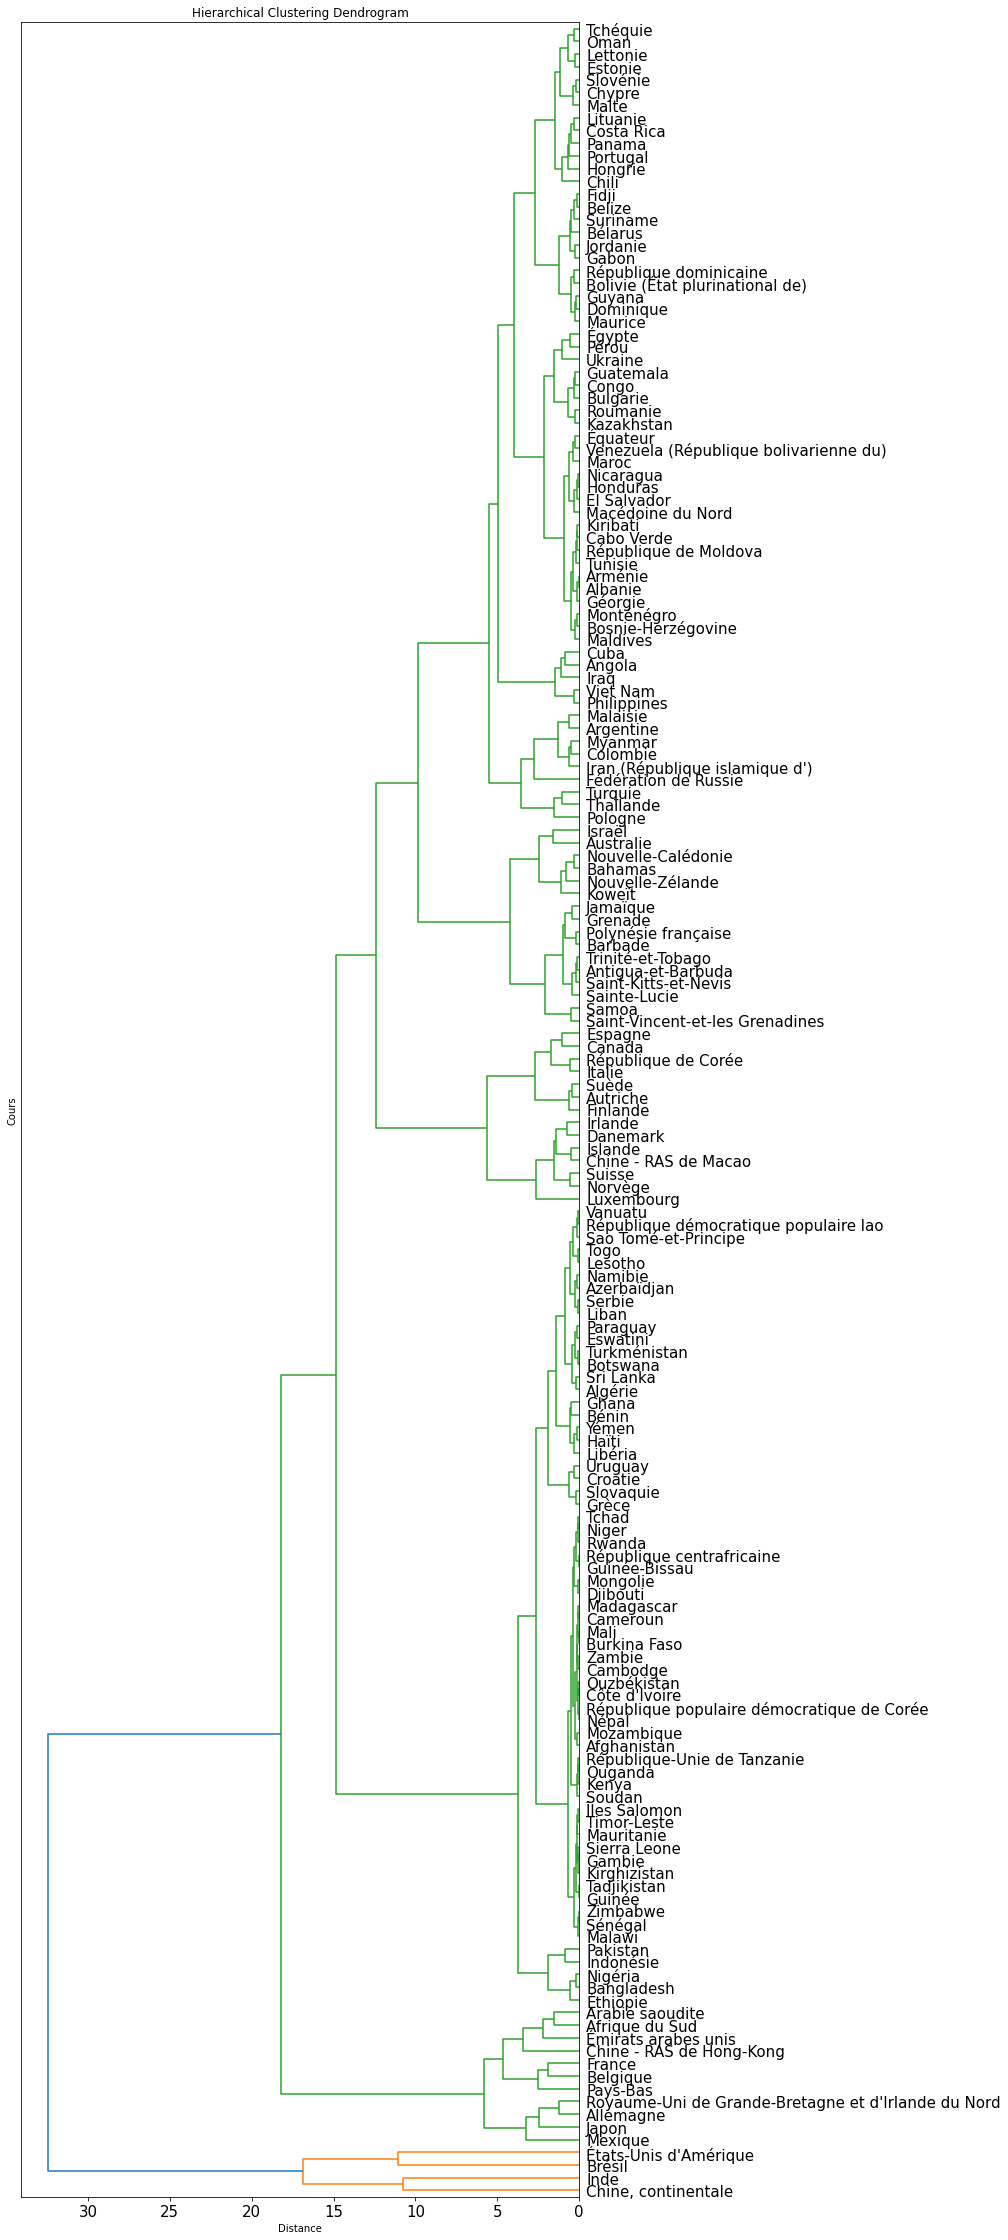

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=names, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Cours")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)


###### ACH

#### testing clustering solutions

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 16):
    hcmod = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    hcmod.fit(X_scaled)
    score = silhouette_score(X_scaled, hcmod.fit_predict(X_scaled))
    silhouette_coefficients.append(score)

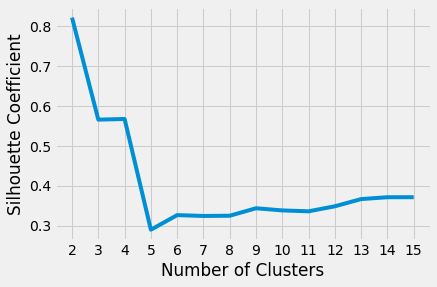

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### number of clusters

In [81]:
model3c = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

model3c = model3c.fit(X_scaled)
model3c

AgglomerativeClustering(n_clusters=4)

In [82]:
labels = model3c.fit_predict(X_scaled) #en que cluster esta cada pais
print(labels)

[0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0]


In [83]:
len(labels)

171

In [84]:
dd = {i:j for i,j in enumerate(list("abcd"))}
labels = [dd[i] for i in model3c.labels_]
labels[:10]

['a', 'c', 'a', 'a', 'c', 'a', 'a', 'c', 'a', 'a']

In [85]:
population_PIB_dispo_alimenatire["cluster"] = labels
population_PIB_dispo_alimenatire.cluster.value_counts()

a    156
c     11
b      2
d      2
Name: cluster, dtype: int64

#### Analysis Hierarchical clustering

In [86]:
labels = model3c.fit_predict(X_scaled)

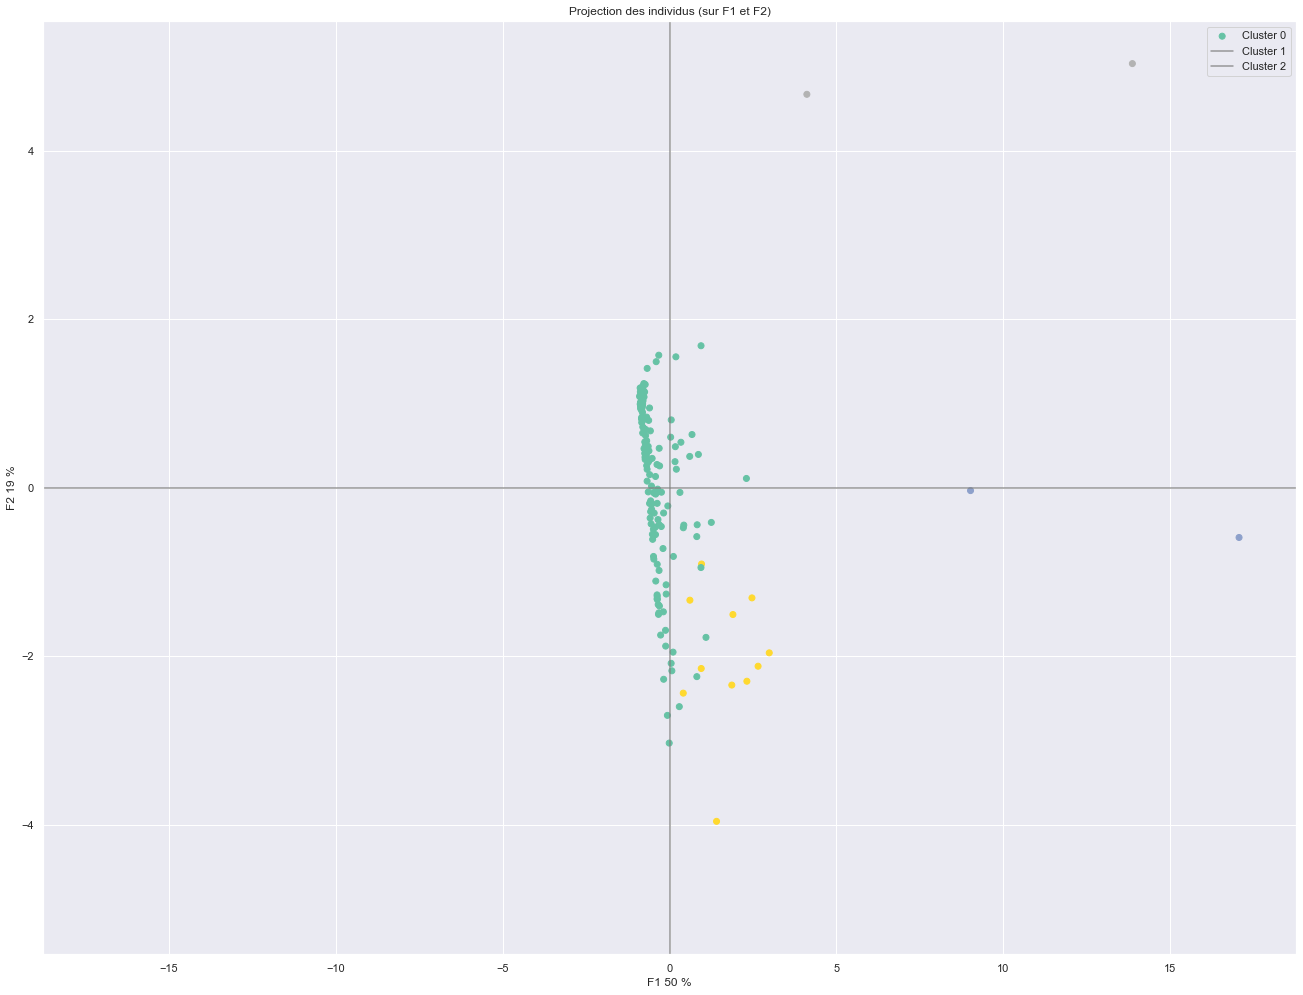

In [94]:
x_y = [0,1]

display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), marker="o", clusters = labels )

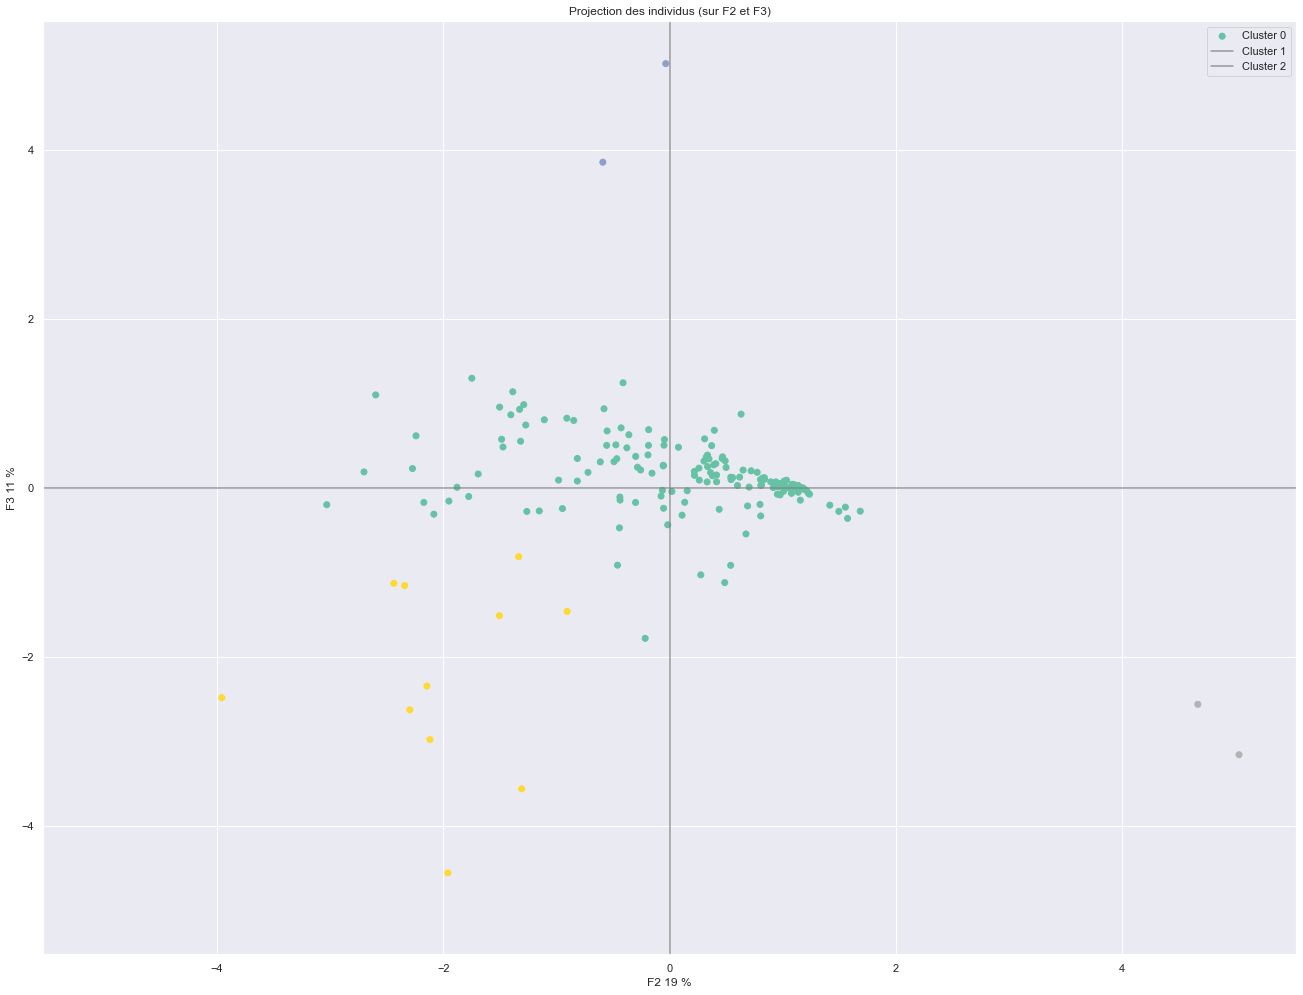

In [95]:
x_y = [1,2]

display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), marker="o", clusters = labels )

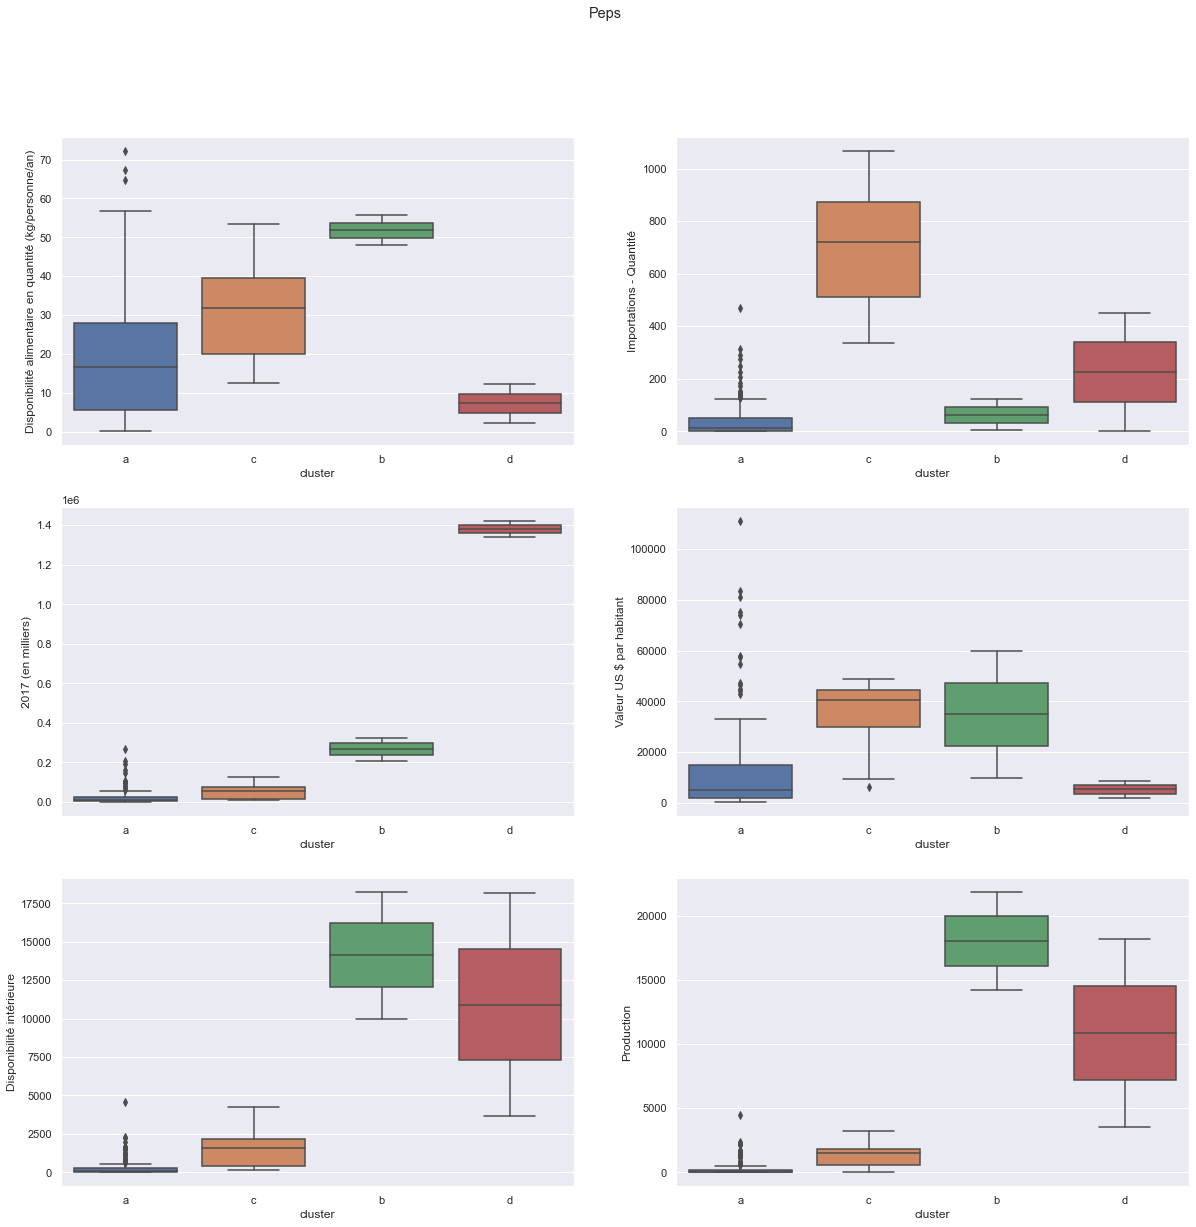

In [96]:
sns.set() # Setting seaborn as default style even if use only matplotlib
# sns.set_style("whitegrid")

gdata = population_PIB_dispo_alimenatire

fig, axes = plt.subplots(3, 2, figsize=(18, 18))

fig.suptitle('Peps')

ax = sns.boxplot(ax=axes[0, 0], x="cluster", y="Disponibilité alimentaire en quantité (kg/personne/an)", ## hue="smoker",              
data=gdata, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[0, 1], x="cluster", y="Importations - Quantité", ## hue="smoker",              
data=gdata, # palette="Set3"
                )

ax = sns.boxplot(ax=axes[1, 0], x="cluster", y="2017 (en milliers)", ## hue="smoker",              
data=gdata, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[1, 1], x="cluster", y="Valeur US $ par habitant", ## hue="smoker",              
data=gdata, # palette="Set3"
                )

ax = sns.boxplot(ax=axes[2, 0], x="cluster", y="Disponibilité intérieure", ## hue="smoker",              
data=gdata, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[2, 1], x="cluster", y="Production", ## hue="smoker",              
data=gdata, # palette="Set3"
                )

In [54]:
population_PIB_dispo_alimenatire[population_PIB_dispo_alimenatire['cluster'] == 'c']

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,2017 (en milliers),Valeur US $,Valeur US $ par habitant,cluster
Zone,,,,,,,,,
Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,57009.756,3.490067e+05,6121.876572,c
Allemagne,19.47,1739.0,646.0,842.0,1514.0,82658.409,3.690849e+06,44651.829102,c
Arabie saoudite,43.36,1435.0,10.0,722.0,616.0,33101.179,6.885861e+05,20802.464299,c
Belgique,12.65,152.0,656.0,338.0,463.0,11419.748,5.027647e+05,44025.903247,c
Chine - RAS de Hong-Kong,53.51,280.0,663.0,907.0,24.0,7306.322,3.412420e+05,46705.027813,c
France,22.90,1573.0,501.0,506.0,1750.0,64842.509,2.595151e+06,38720.645922,c
Japon,18.50,2415.0,10.0,1069.0,2215.0,127502.725,4.930837e+06,38672.407740,c
Mexique,32.52,4219.0,9.0,972.0,3249.0,124777.324,1.158912e+06,9287.841557,c
Pays-Bas,20.33,372.0,1418.0,608.0,1100.0,17021.347,8.338696e+05,48989.638816,c


### Kmeans clustering

#### Testing clustering solutions

In [55]:
# A list holds the silhouette coefficients for each k
km_silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, cluster_labels)
    km_silhouette_coefficients.append(score)

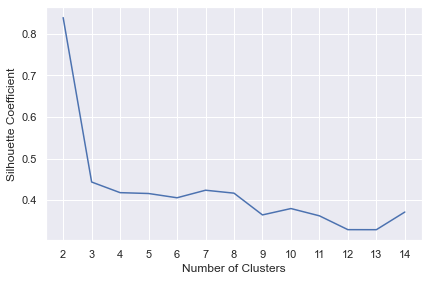

In [56]:
plt.plot(range(2, 15), km_silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [57]:
km_silhouette_coefficients

[0.8391807470204108,
 0.4436539659420005,
 0.41806856439416473,
 0.41601273957793944,
 0.40575515405054985,
 0.42390747805408496,
 0.4168392390825435,
 0.36449943406224616,
 0.37982415754344995,
 0.36230774564555945,
 0.32903337082779627,
 0.32893842636303217,
 0.3714131041957006]

####  K means 

In [97]:
kmeans = KMeans(n_clusters=4)

In [98]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

In [99]:
labels = kmeans.labels_
labels

array([3, 0, 3, 3, 0, 3, 1, 0, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 1, 2, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 1, 0, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3,
       3, 1, 3, 3, 3, 1, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 3, 3, 1, 3, 0, 3, 1, 1, 1, 3, 3, 0, 3, 3, 1, 3, 1, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3])

In [100]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.68075232,  0.52471694,  0.6647664 ,  3.66484538,  0.33996769,
         0.14109695,  0.78882574,  0.96473257],
       [ 0.98771886, -0.10666534, -0.07229987, -0.13240851, -0.09422883,
        -0.19032827, -0.06890136,  0.86126729],
       [ 1.17140826,  6.7984455 ,  5.95192184,  0.56316119,  7.03523086,
         3.97473485,  5.86717037,  0.62673849],
       [-0.55569127, -0.18220238, -0.18658676, -0.25852091, -0.17925677,
        -0.03229014, -0.19617568, -0.50451333]])

In [101]:
len(labels)

171

In [102]:
dd = {i:j for i,j in enumerate(list("abcd"))}
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['d', 'a', 'd', 'd', 'a', 'd', 'b', 'a', 'b', 'd']

In [103]:
population_PIB_dispo_alimenatire_copy["cluster"] = labels
population_PIB_dispo_alimenatire_copy.cluster.value_counts()

d    108
b     51
a      9
c      3
Name: cluster, dtype: int64

#### ACP

In [104]:
labels = kmeans.labels_

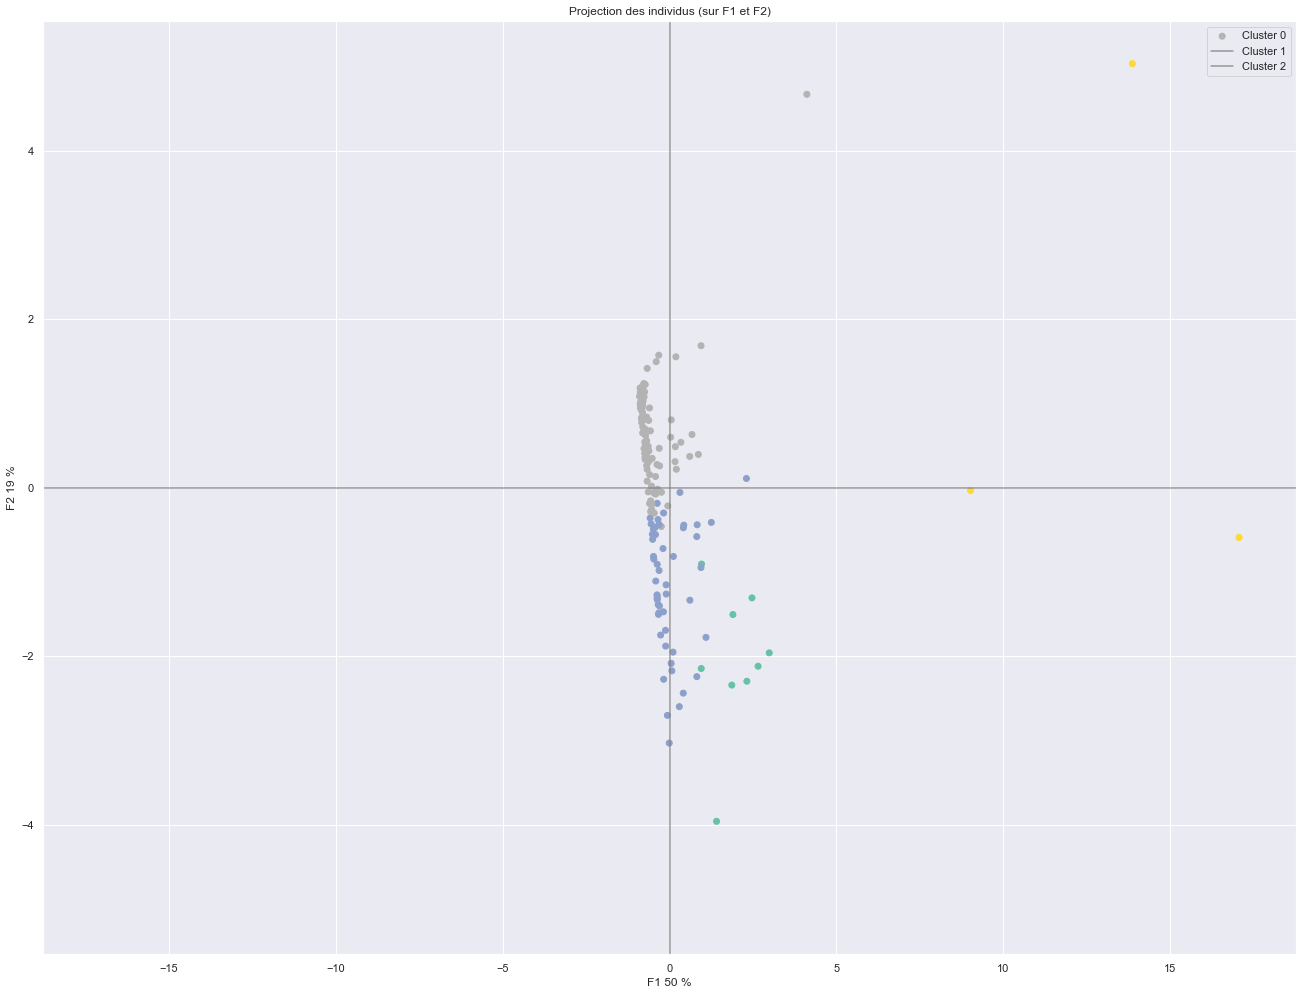

In [105]:
x_y = [0,1]

display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), marker="o", clusters = labels )

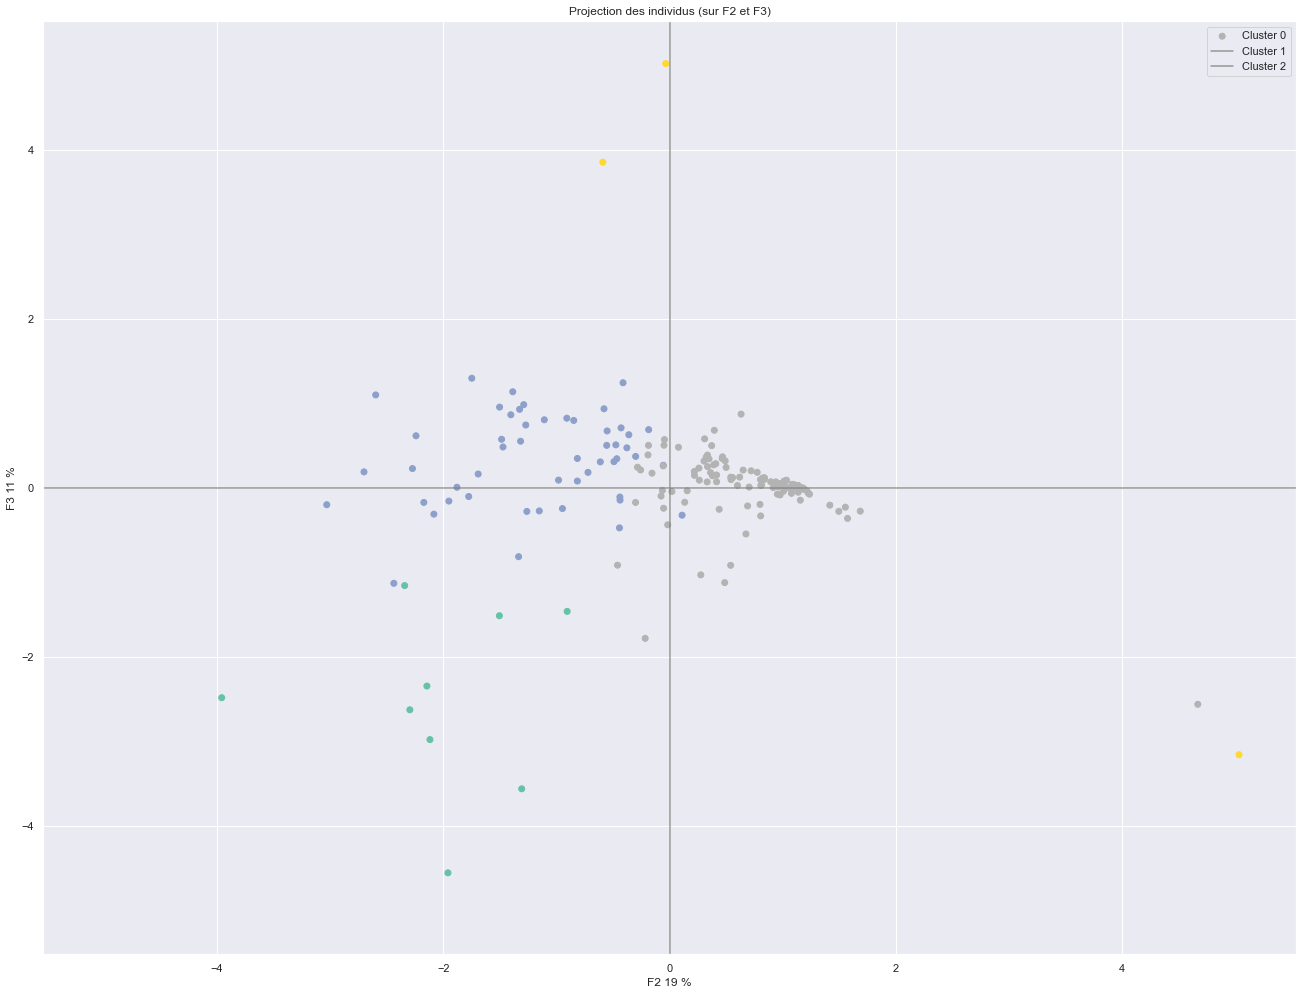

In [106]:
x_y = [1,2]

display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), marker="o", clusters = labels )

##### Analysis k-means clustering

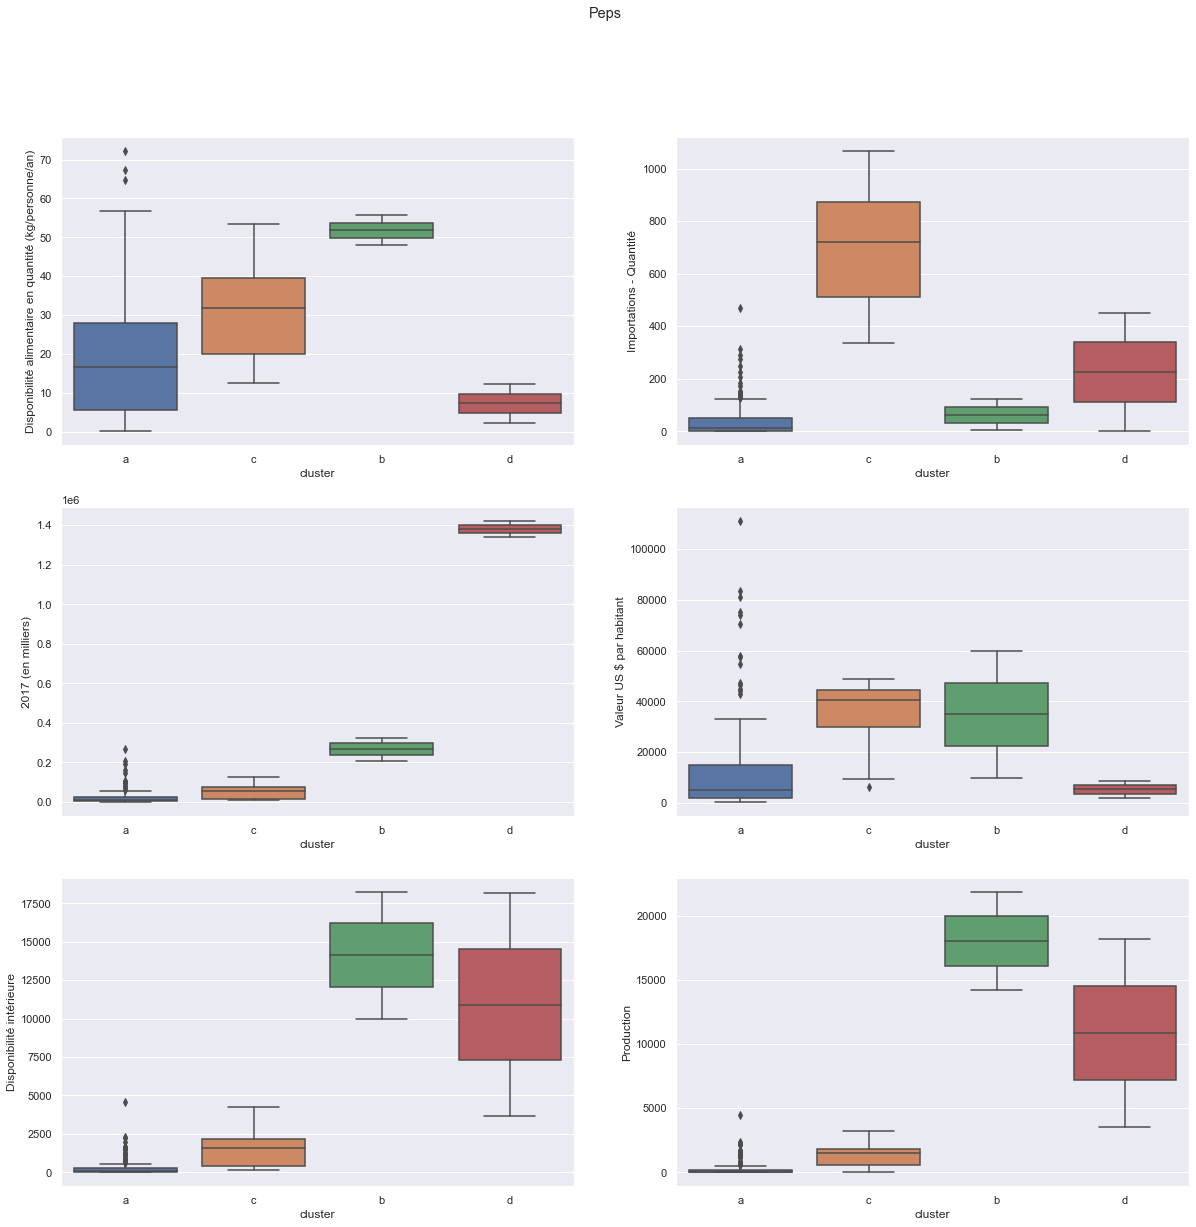

In [107]:
sns.set() # Setting seaborn as default style even if use only matplotlib
# sns.set_style("whitegrid")

gdata = population_PIB_dispo_alimenatire

fig, axes = plt.subplots(3, 2, figsize=(18, 18))

fig.suptitle('Peps')

ax = sns.boxplot(ax=axes[0, 0], x="cluster", y="Disponibilité alimentaire en quantité (kg/personne/an)", ## hue="smoker",              
data=gdata, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[0, 1], x="cluster", y="Importations - Quantité", ## hue="smoker",              
data=gdata, # palette="Set3"
                )

ax = sns.boxplot(ax=axes[1, 0], x="cluster", y="2017 (en milliers)", ## hue="smoker",              
data=gdata, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[1, 1], x="cluster", y="Valeur US $ par habitant", ## hue="smoker",              
data=gdata, # palette="Set3"
                )

ax = sns.boxplot(ax=axes[2, 0], x="cluster", y="Disponibilité intérieure", ## hue="smoker",              
data=gdata, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[2, 1], x="cluster", y="Production", ## hue="smoker",              
data=gdata, # palette="Set3"
                )

In [112]:
population_PIB_dispo_alimenatire_copy[population_PIB_dispo_alimenatire_copy['cluster'] == 'c']

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,2017 (en milliers),Valeur US $,Valeur US $ par habitant,cluster
Zone,,,,,,,,,
Brésil,48.03,9982.0,4223.0,3.0,14201.0,207833.823,2.063515e+06,9928.675992,c
"Chine, continentale",12.33,18161.0,576.0,452.0,18236.0,1421021.791,1.231049e+07,8663.126784,c
États-Unis d'Amérique,55.68,18266.0,3692.0,123.0,21914.0,325084.756,1.947962e+07,59921.674703,c


In [113]:
population_PIB_dispo_alimenatire_copy[population_PIB_dispo_alimenatire_copy['cluster'] == 'a']

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,2017 (en milliers),Valeur US $,Valeur US $ par habitant,cluster
Zone,,,,,,,,,
Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,57009.756,3.490067e+05,6121.876572,a
Allemagne,19.47,1739.0,646.0,842.0,1514.0,82658.409,3.690849e+06,44651.829102,a
Arabie saoudite,43.36,1435.0,10.0,722.0,616.0,33101.179,6.885861e+05,20802.464299,a
Chine - RAS de Hong-Kong,53.51,280.0,663.0,907.0,24.0,7306.322,3.412420e+05,46705.027813,a
France,22.90,1573.0,501.0,506.0,1750.0,64842.509,2.595151e+06,38720.645922,a
Japon,18.50,2415.0,10.0,1069.0,2215.0,127502.725,4.930837e+06,38672.407740,a
Mexique,32.52,4219.0,9.0,972.0,3249.0,124777.324,1.158912e+06,9287.841557,a
Pays-Bas,20.33,372.0,1418.0,608.0,1100.0,17021.347,8.338696e+05,48989.638816,a
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,31.94,2234.0,359.0,779.0,1814.0,66727.461,2.699017e+06,40448.365256,a


In [115]:
#population_PIB_dispo_alimenatire[population_PIB_dispo_alimenatire['cluster'] == 'c']

### Correlation graph

In [70]:
x, y = 0,1

In [71]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [72]:
x_y = (0,1)
x_y

(0, 1)

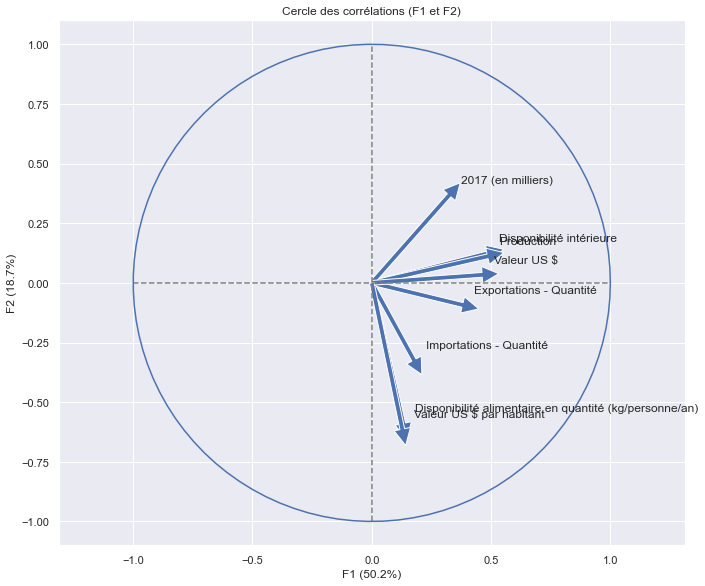

In [73]:
correlation_graph(pca, (0,1), features)

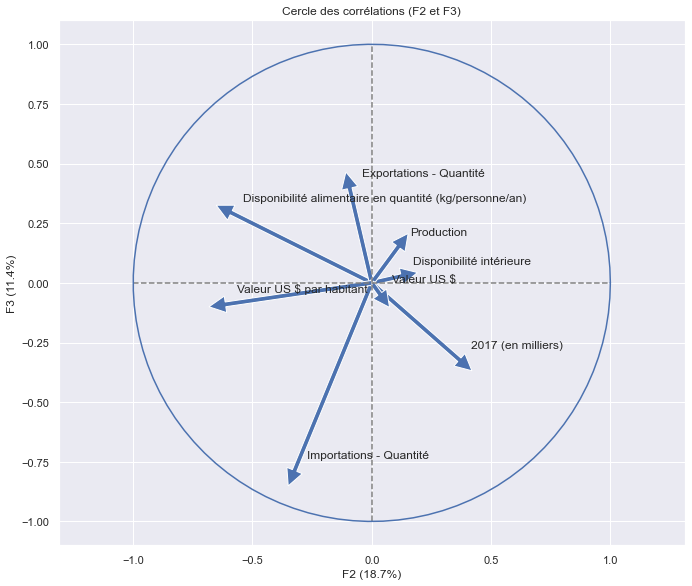

In [74]:
correlation_graph(pca, (1,2), features)